In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)

In [2]:
df = pd.read_csv('/content/AMZN_data.csv')
print(df.shape)
df.head()

(1259, 7)


,date,open,high,low,close,volume,Name
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN


**Adding a new Year column**

In [3]:
df['year'] = pd.DatetimeIndex(df['date']).year


**Visualizing Yearly Based Open, Close, High and Low Stocks MAX**

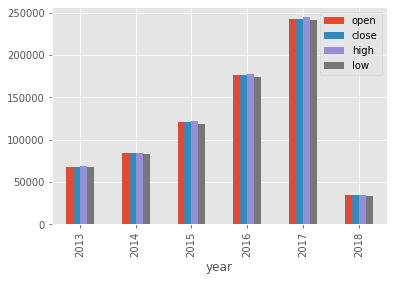

In [4]:
tempdf = df.groupby('year',as_index=False).sum()
tempdf.plot('year',['open','close','high','low'],kind = 'bar')

**Visualizing the amount of stocks sold over year**

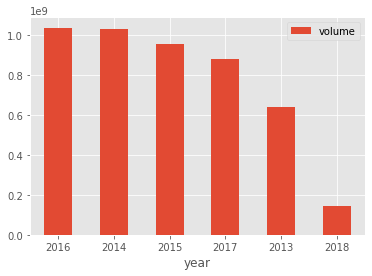

In [5]:
x = df.groupby('year').sum().sort_values('volume', ascending = False)
x.plot.bar( y='volume', rot=0)

**Visualizing the amount of data each year**

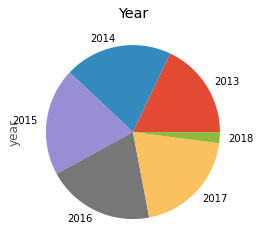

In [6]:
df.groupby('year')['year'].agg('count').plot(kind='pie',title='Year')

In [7]:
newDf = df[(df.year==2013)]
newDf.volume.sum()
s = df.year.value_counts()
x = s.to_dict()
x

{2013: 226, 2014: 252, 2015: 252, 2016: 252, 2017: 251, 2018: 26}

In [8]:
def yearlyAllocatedData(years_dict,totalSize):
    allocation = []
    for i in years_dict:
        allocation.append((100 * years_dict[i] / totalSize))
    return allocation

In [9]:
print(yearlyAllocatedData(x,len(df)))

[20.015885623510723, 20.015885623510723, 20.015885623510723, 19.936457505957108, 17.95075456711676, 2.0651310563939633]


**Filtering 2018 data since, there is very less number of data we have for that year**

In [10]:
df = df[df['year'] != 2018]
df

,date,open,high,low,close,volume,Name,year
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN,2013
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN,2013
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN,2013
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN,2013
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN,2013
...,...,...,...,...,...,...,...,...
1228,2017-12-22,1172.08,1174.62,1167.830,1168.36,1585054,AMZN,2017
1229,2017-12-26,1168.36,1178.32,1160.550,1176.76,2005187,AMZN,2017
1230,2017-12-27,1179.91,1187.29,1175.610,1182.26,1867208,AMZN,2017
1231,2017-12-28,1189.00,1190.10,1184.380,1186.10,1841676,AMZN,2017


**Grapical Visualization of  Open, Close, High and Low Stocks over Days**

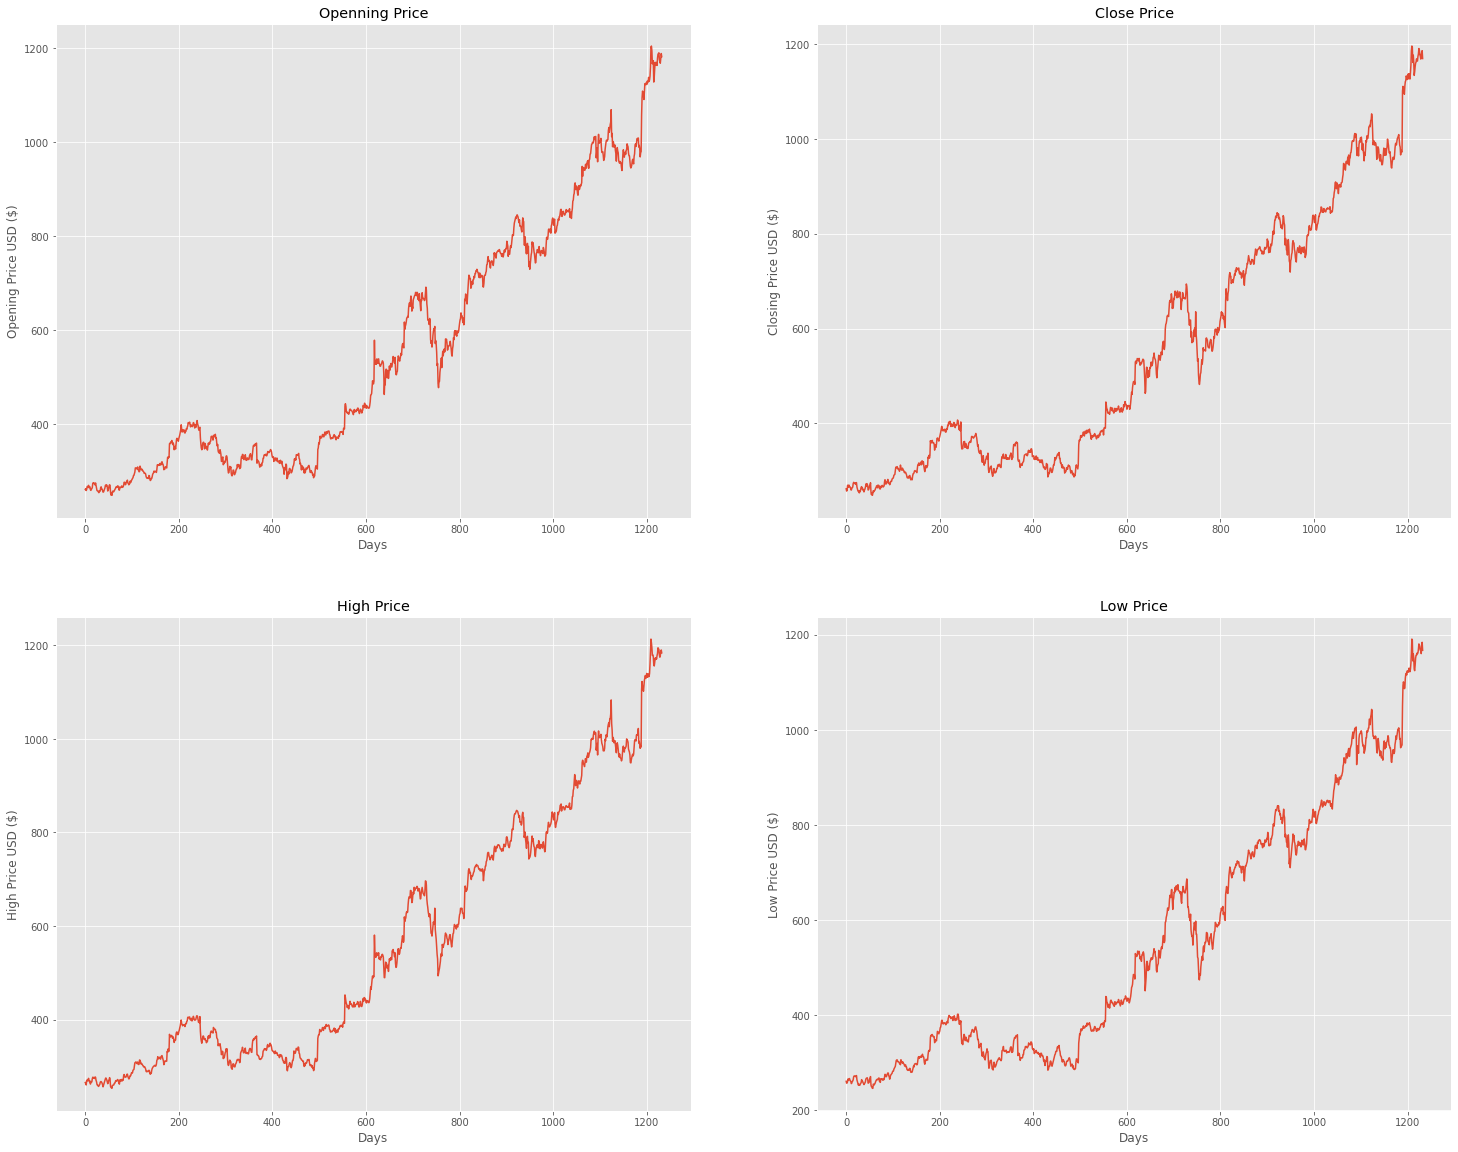

In [11]:
fig = plt.figure(figsize=(25,20))

# Visualizing the opening prices of the data.
plt.subplot(2,2,1)
plt.title('Openning Price')
plt.xlabel('Days')
plt.ylabel('Opening Price USD ($)')
plt.plot(df['open'])

# Visualizing the closing prices of the data.
plt.subplot(2,2,2)
plt.title('Close Price')
plt.xlabel('Days')
plt.ylabel('Closing Price USD ($)')
plt.plot(df['close'])

# Visualizing the high prices of the data.
plt.subplot(2,2,3)
plt.title('High Price')
plt.xlabel('Days')
plt.ylabel('High Price USD ($)')
plt.plot(df['high'])

# Visualizing the low prices of the data.
plt.subplot(2,2,4)
plt.title('Low Price')
plt.xlabel('Days')
plt.ylabel('Low Price USD ($)')
plt.plot(df['low'])

plt.show()

**Grapical Visualization of Date Over Open, Close, High and Low Stocks**

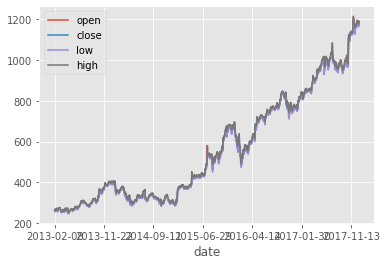

In [12]:
df.plot(kind = "line",x = 'date' , y = ['open', 'close', 'low','high'])

**Grapical Visualization of Date Over Open, Close, High and Low Stocks (*Clear Insights*)**

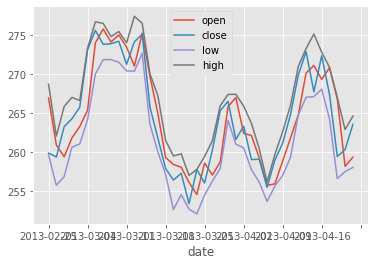

In [13]:
df[10:50].plot(kind = "line",x = 'date' , y = ['open', 'close', 'low','high'])

**Grapical Visualization of Yearly Based Open, Close, High and Low Stocks Over Month**

In [14]:
df['months'] = pd.DatetimeIndex(df['date']).month
df.head()

,date,open,high,low,close,volume,Name,year,months
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN,2013,2
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN,2013,2
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN,2013,2
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN,2013,2
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN,2013,2


In [15]:
yearly_open_Pivot = pd.pivot_table(df, values = "open", columns = "year", index = "months")
yearly_close_Pivot = pd.pivot_table(df, values = "close", columns = "year", index = "months")
yearly_high_Pivot = pd.pivot_table(df, values = "high", columns = "year", index = "months")
yearly_low_Pivot = pd.pivot_table(df, values = "low", columns = "year", index = "months")

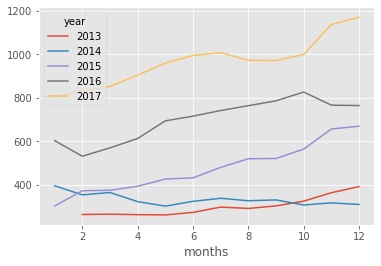

In [16]:
yearly_open_Pivot.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f87052e6210>,
      dtype=object)

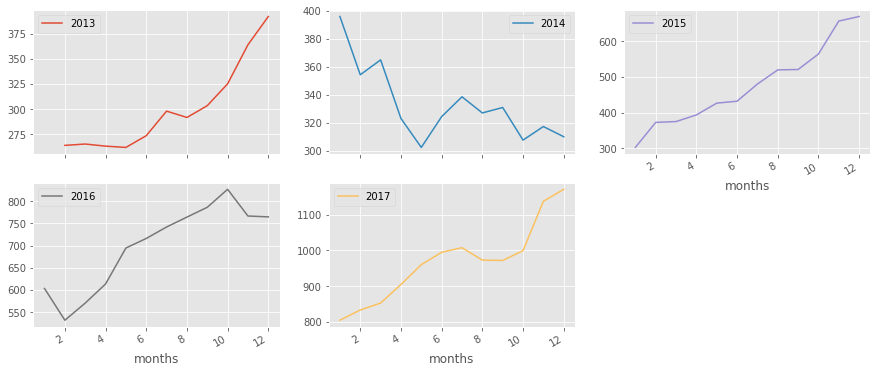

In [17]:
yearly_open_Pivot.plot(subplots = True, figsize=(15, 10), layout=(3,3))

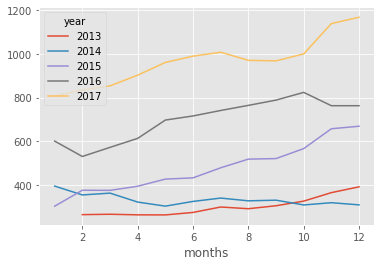

In [18]:
yearly_close_Pivot.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8704eea150>,
      dtype=object)

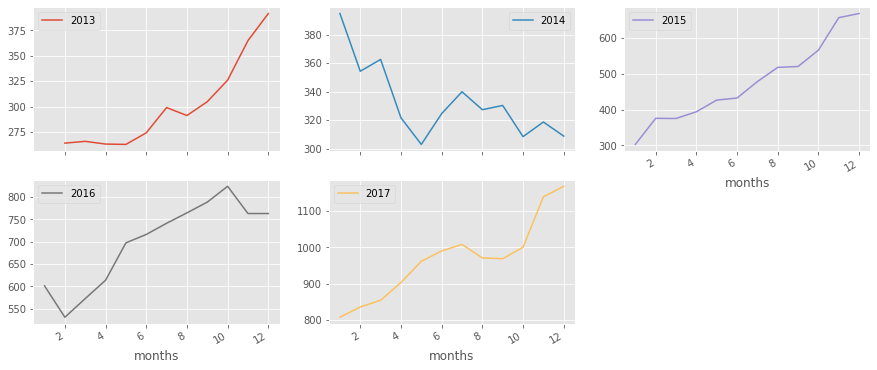

In [19]:
yearly_close_Pivot.plot(subplots = True, figsize=(15, 10), layout=(3,3))

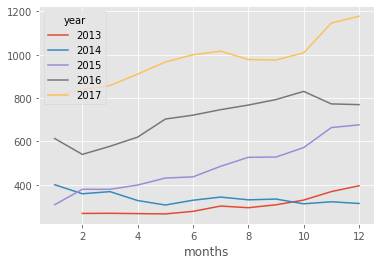

In [20]:
yearly_high_Pivot.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8704b44310>,
      dtype=object)

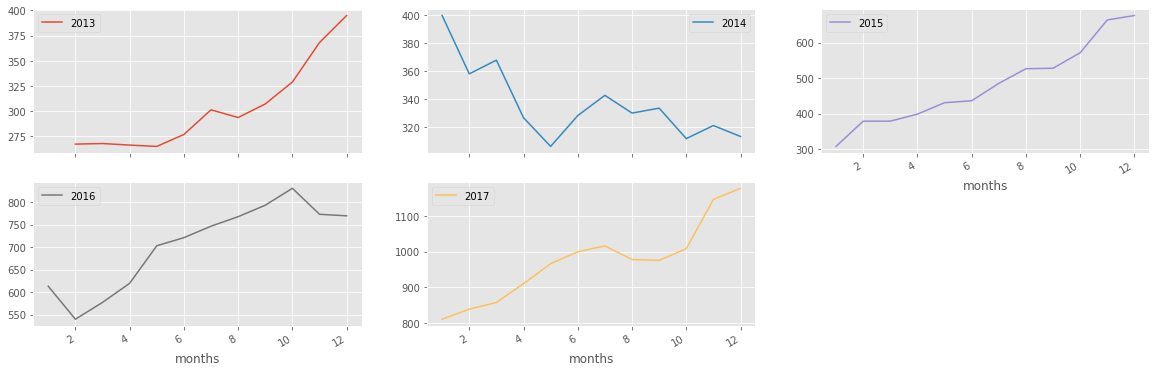

In [21]:
yearly_high_Pivot.plot(subplots = True, figsize=(20, 10), layout=(3,3))

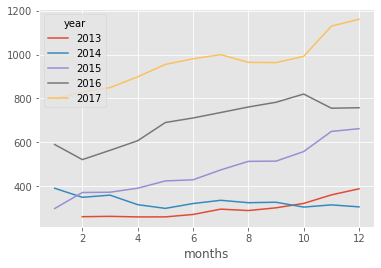

In [22]:
yearly_low_Pivot.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8704926ad0>,
      dtype=object)

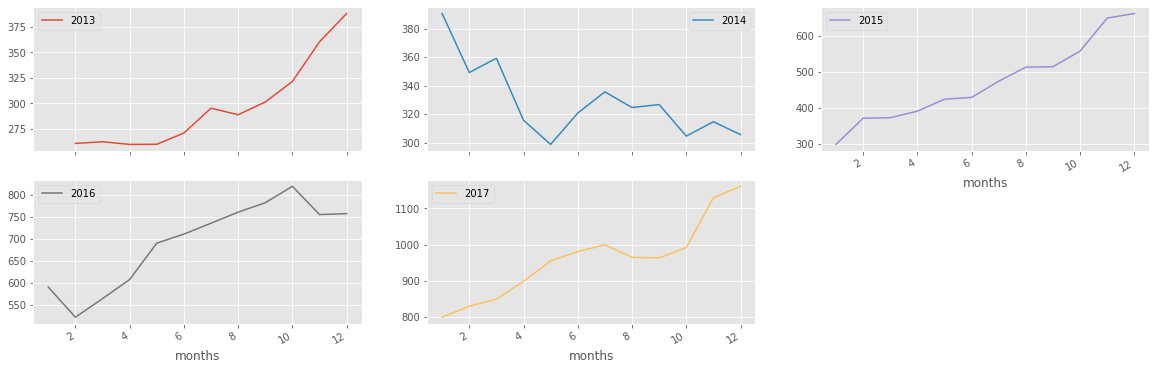

In [23]:
yearly_low_Pivot.plot(subplots = True, figsize=(20, 10), layout=(3,3))

# Predicting the closing price stock

In [24]:
df.head()

,date,open,high,low,close,volume,Name,year,months
0,2013-02-08,261.40,265.25,260.555,261.95,3879078,AMZN,2013,2
1,2013-02-11,263.20,263.25,256.600,257.21,3403403,AMZN,2013,2
2,2013-02-12,259.19,260.16,257.000,258.70,2938660,AMZN,2013,2
3,2013-02-13,261.53,269.96,260.300,269.47,5292996,AMZN,2013,2
4,2013-02-14,267.37,270.65,265.400,269.24,3462780,AMZN,2013,2


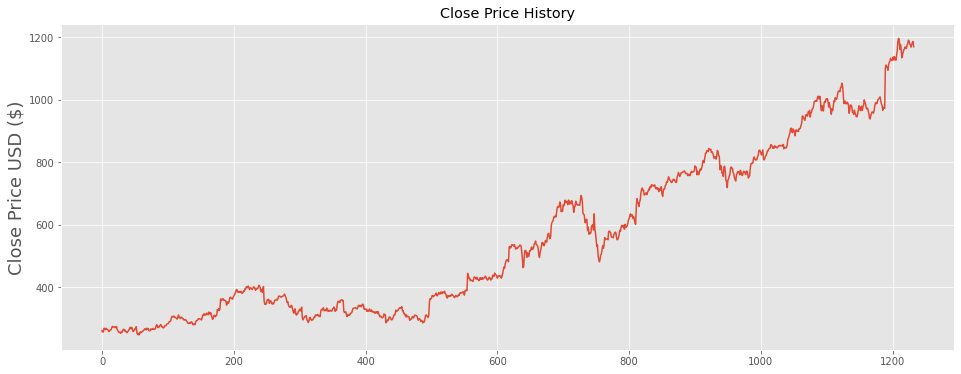

In [25]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['close'])
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [26]:

data = df.filter(['close'])
# Convert the dataframe to a numpy array
dataset = data.values

training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1172

In [27]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01447868],
       [0.00947657],
       [0.01104897],
       ...,
       [0.98567961],
       [0.98973195],
       [0.97218236]])

In [28]:
# Create the training data set 

train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

x_train, y_train = np.array(x_train), np.array(y_train)


x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


[array([0.01447868, 0.00947657, 0.01104897, 0.02241452, 0.0221718 ,
       0.01779232, 0.02271   , 0.01918531, 0.01868932, 0.01814057,
       0.01228366, 0.01174546, 0.01585057, 0.01692697, 0.01847826,
       0.0262558 , 0.02887294, 0.02697341, 0.02706838, 0.02739553,
       0.0242824 , 0.02733221, 0.02835585, 0.01847826, 0.01434149,
       0.01019417, 0.00863233, 0.00954833, 0.00544534, 0.01004643,
       0.00822077, 0.01274799, 0.01801393, 0.01926973, 0.01411988,
       0.01592655, 0.01139721, 0.01144998, 0.00765091, 0.01131279,
       0.01362389, 0.01745462, 0.02281553, 0.02600253, 0.02056775,
       0.02544322, 0.02023005, 0.01180878, 0.01275855, 0.01616716,
       0.021813  , 0.02168637, 0.02793373, 0.00694386, 0.0015935 ,
       0.00588856, 0.        , 0.00455889, 0.01036302, 0.00790418])]
[0.010025327142254181]

[array([0.01447868, 0.00947657, 0.01104897, 0.02241452, 0.0221718 ,
       0.01779232, 0.02271   , 0.01918531, 0.01868932, 0.01814057,
       0.01228366, 0.01174546, 0.0

In [29]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(x_train, y_train, batch_size=8, epochs=100)

Epoch 1/100
139/139 [==============================] - 12s 59ms/step - loss: 0.0026
Epoch 2/100
139/139 [==============================] - 8s 58ms/step - loss: 5.0268e-04
Epoch 3/100
139/139 [==============================] - 8s 59ms/step - loss: 4.7954e-04
Epoch 4/100
139/139 [==============================] - 8s 58ms/step - loss: 4.4894e-04
Epoch 5/100
139/139 [==============================] - 8s 58ms/step - loss: 3.6127e-04
Epoch 6/100
139/139 [==============================] - 8s 59ms/step - loss: 3.9786e-04
Epoch 7/100
139/139 [==============================] - 8s 58ms/step - loss: 3.4001e-04
Epoch 8/100
139/139 [==============================] - 8s 58ms/step - loss: 2.8775e-04
Epoch 9/100
139/139 [==============================] - 8s 58ms/step - loss: 2.6333e-04
Epoch 10/100
139/139 [==============================] - 8s 59ms/step - loss: 2.6629e-04
Epoch 11/100
139/139 [==============================] - 8s 61ms/step - loss: 2.4779e-04
Epoch 12/100
139/139 [======================

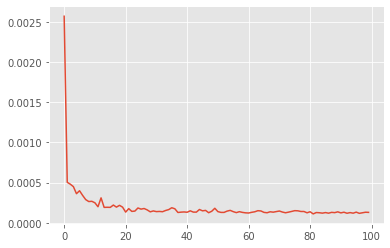

In [30]:
plt.plot(history.history['loss'])

In [31]:

test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    

x_test = np.array(x_test)


x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))


predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

26.707037076258835

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


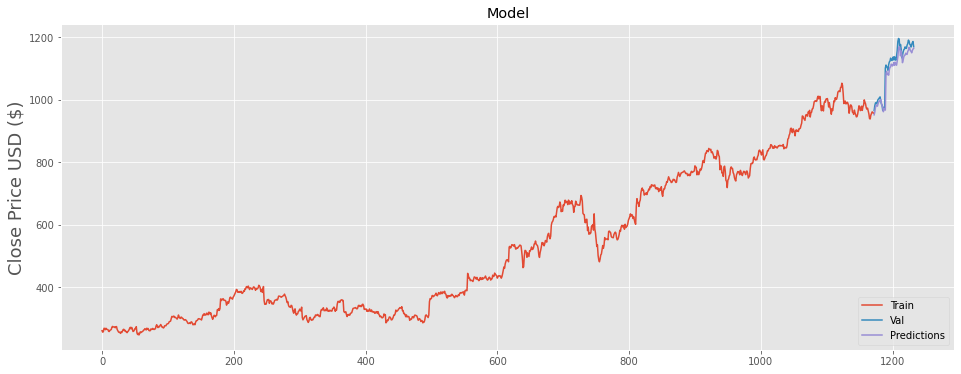

In [32]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [33]:
# Show the valid and predicted prices
valid

,close,Predictions
1172,965.45,951.747314
1173,980.85,960.436646
1174,989.58,975.132507
1175,990.99,982.339294
1176,987.20,982.786743
...,...,...
1228,1168.36,1154.910034
1229,1176.76,1149.994995
1230,1182.26,1157.302979
1231,1186.10,1161.871582
